In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import DisplayHandle, Pretty, Image

from optvis import visualize_feature

In [2]:
import pickle
from urllib.request import urlopen
imagenet_y_to_label = pickle.load(urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))

In [3]:
def show_cached_viz(model_name, layer, feature, label="", label_handle=None, img_handle=None):
    if label_handle == None:
        label_handle = DisplayHandle()
        label_handle.display(Pretty(""))
    if img_handle == None:
        img_handle = DisplayHandle()
        img_handle.display(Pretty(""))
    label_handle.update(Pretty(label))
    md = Image(f"https://s3-us-west-2.amazonaws.com/veriph.ai-featureviz-map/{model_name}/{layer}/{feature}.png",width=500,height=500)
    img_handle.update(md)

tench, Tinca tinca

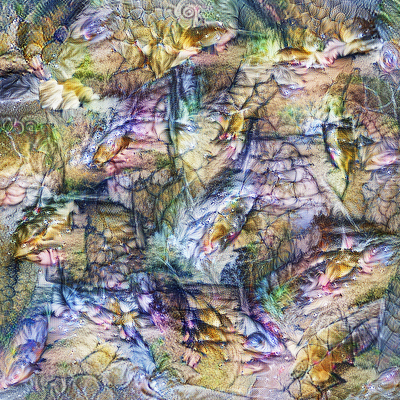

interactive(children=(IntSlider(value=0, continuous_update=False, description='feature', max=999), Output()), …

In [4]:
label_handle = DisplayHandle()
label_handle.display(Pretty(""))
img_handle = DisplayHandle()
img_handle.display(Pretty(""))
interactive_plot = interact(
    lambda feature: 
        show_cached_viz("resnet50", "fc", feature, label=imagenet_y_to_label[feature],label_handle=label_handle,img_handle=img_handle),
        feature=widgets.IntSlider(min=0,max=999,step=1,continuous_update=False),
)